### Working on different model 

In [25]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix


In [26]:
df = sns.load_dataset('titanic')

In [27]:
df = df.drop(columns=['deck', 'embark_town', 'alive'])
df.dropna(subset=['embarked'],inplace=True)

df['age'] =  df['age'].fillna(df['age'].median())

In [28]:
# Encoding Categorical Variables

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['class'] = le.fit_transform(df['class']) 
df['alone'] = le.fit_transform(df['alone'])      

In [29]:
df = df.drop(columns=['adult_male','embarked', 'who'])

In [30]:
df.dropna(inplace=True)

In [31]:
X = df.drop(columns='survived')
y = df['survived']

C:\Users\bisss\AppData\Local\Temp\ipykernel_7824\341745428.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', data=df, palette='Set2')


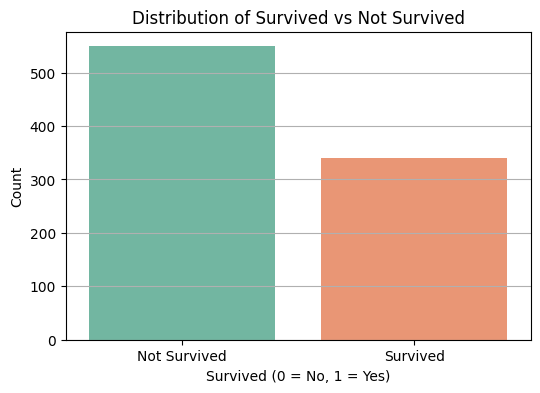

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(x='survived', data=df, palette='Set2')
plt.title("Distribution of Survived vs Not Survived")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.grid(axis='y')
plt.show()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,stratify=y
)

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
dt_preds = dt_model.predict(X_test)

In [36]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
rf_preds = rf_model.predict(X_test)

In [37]:
svm_model = SVC()
svm_model.fit(X_train_scaled,y_train)
svm_preds = svm_model.predict(X_test_scaled)

In [38]:
def evaluate(model_name, y_true, y_pred):
    print(f"\n Evaluation for {model_name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

In [39]:
evaluate("Decision Tree", y_test, dt_preds)


 Evaluation for Decision Tree
Accuracy: 0.7696629213483146
Confusion Matrix:
 [[90 20]
 [21 47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81       110
           1       0.70      0.69      0.70        68

    accuracy                           0.77       178
   macro avg       0.76      0.75      0.76       178
weighted avg       0.77      0.77      0.77       178



In [40]:
evaluate("Random Forest", y_test, rf_preds)


 Evaluation for Random Forest
Accuracy: 0.7865168539325843
Confusion Matrix:
 [[91 19]
 [19 49]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       110
           1       0.72      0.72      0.72        68

    accuracy                           0.79       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.79      0.79      0.79       178



In [41]:
evaluate("SVM", y_test, svm_preds)


 Evaluation for SVM
Accuracy: 0.8089887640449438
Confusion Matrix:
 [[97 13]
 [21 47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.78      0.69      0.73        68

    accuracy                           0.81       178
   macro avg       0.80      0.79      0.79       178
weighted avg       0.81      0.81      0.81       178



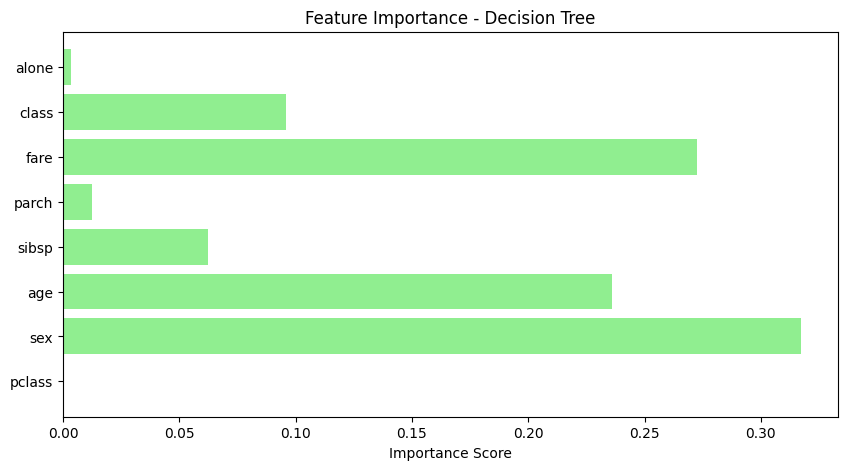

In [42]:
importances_dt = dt_model.feature_importances_
features = X.columns

plt.figure(figsize=(10,5))
plt.barh(features,importances_dt,color='lightgreen')
plt.title("Feature Importance - Decision Tree")
plt.xlabel("Importance Score")
plt.show()

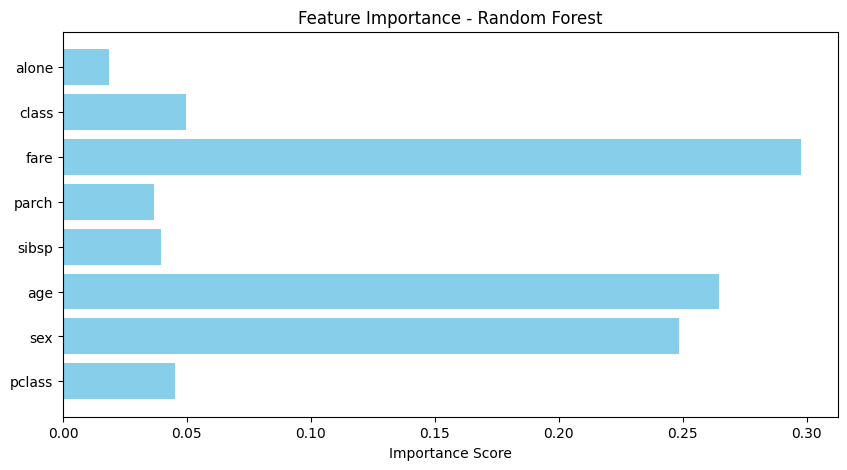

In [43]:
importances_rf = rf_model.feature_importances_

plt.figure(figsize=(10,5))
plt.barh(features,importances_rf,color='skyblue')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.show()

In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score

results = {
    "Model": ["Decision Tree", "Random Forest", "SVM"],
    "Accuracy": [
        accuracy_score(y_test, dt_preds),
        accuracy_score(y_test, rf_preds),
        accuracy_score(y_test, svm_preds)
    ],
    "Precision": [
        precision_score(y_test, dt_preds),
        precision_score(y_test, rf_preds),
        precision_score(y_test, svm_preds)
    ],
    "Recall": [
        recall_score(y_test, dt_preds),
        recall_score(y_test, rf_preds),
        recall_score(y_test, svm_preds)
    ],
    "F1 Score": [
        f1_score(y_test, dt_preds),
        f1_score(y_test, rf_preds),
        f1_score(y_test, svm_preds)
    ]
}

comparison_df = pd.DataFrame(results)
comparison_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.769663,0.701493,0.691176,0.696296
1,Random Forest,0.786517,0.720588,0.720588,0.720588
2,SVM,0.808989,0.783333,0.691176,0.734375


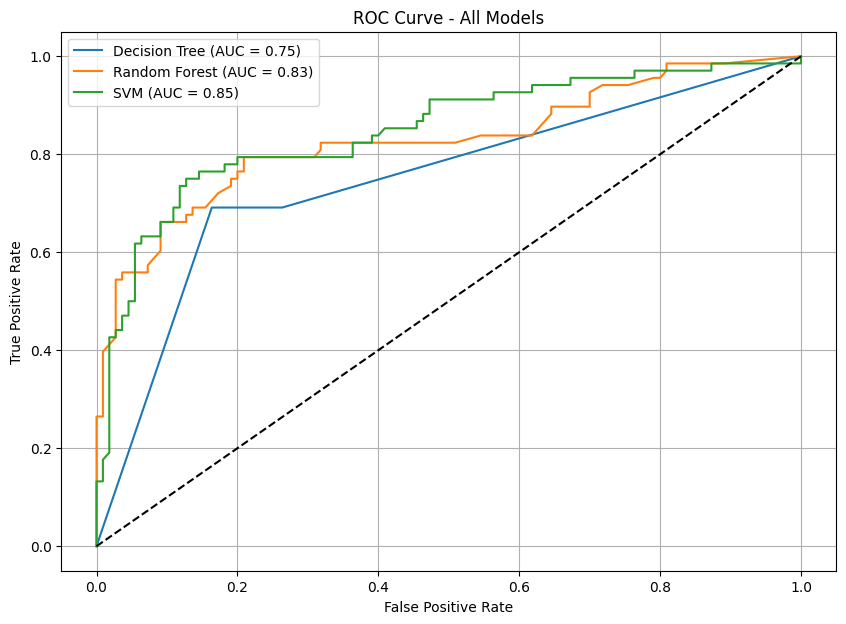

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities (needed for ROC)
dt_probs = dt_model.predict_proba(X_test)[:,1]
rf_probs = rf_model.predict_proba(X_test)[:,1]
svm_probs = svm_model.decision_function(X_test_scaled)  # For SVM, use decision_function

# Compute FPR, TPR for each
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

# Plot ROC curves
plt.figure(figsize=(10,7))
plt.plot(dt_fpr, dt_tpr, label=f"Decision Tree (AUC = {roc_auc_score(y_test, dt_probs):.2f})")
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {roc_auc_score(y_test, rf_probs):.2f})")
plt.plot(svm_fpr, svm_tpr, label=f"SVM (AUC = {roc_auc_score(y_test, svm_probs):.2f})")
plt.plot([0,1], [0,1], 'k--')  # Diagonal line
plt.title("ROC Curve - All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


In [46]:
# Decision Tree
dt_scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
print(f"Decision Tree Accuracy (5-fold): {dt_scores}")
print(f"Mean Accuracy: {dt_scores.mean():.4f}")

# Random Forest
rf_scores = cross_val_score(RandomForestClassifier(), X, y, cv=5)
print(f"\nRandom Forest Accuracy (5-fold): {rf_scores}")
print(f"Mean Accuracy: {rf_scores.mean():.4f}")

# SVM (requires scaled features)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svm_pipeline = make_pipeline(StandardScaler(), SVC())

svm_scores = cross_val_score(svm_pipeline, X, y, cv=5)
print(f"\nSVM Accuracy (5-fold): {svm_scores}")
print(f"Mean Accuracy: {svm_scores.mean():.4f}")


Decision Tree Accuracy (5-fold): [0.71910112 0.78651685 0.83146067 0.75842697 0.82485876]
Mean Accuracy: 0.7841

Random Forest Accuracy (5-fold): [0.76966292 0.79775281 0.87078652 0.76966292 0.84745763]
Mean Accuracy: 0.8111

SVM Accuracy (5-fold): [0.82022472 0.80898876 0.82022472 0.82022472 0.86440678]
Mean Accuracy: 0.8268
